<a href="https://colab.research.google.com/github/akinyeleolat/dog-cats-classification/blob/main/dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='oluwatosinaakinyele'
os.environ['KAGGLE_KEY']='dc962ca717c5417374e956e1a4fd01f9'
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#upload data
from zipfile import ZipFile
file_name ="/content/dogs-vs-cats.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
#upload data
from zipfile import ZipFile
file_name ="/content/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir) #make base directory

In [ ]:
#Create directory paths

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
import shutil

# def createFName(org_data_dir, train_data_class_dir, rangeInput1, rangeInput2):
#     "This funciton is to create the source and desitnation paths and copy the data."
#     fnames = ['cat.{}.jpg'.format(i) for i in range(rangeInput1,rangeInput2)]
#     for fname in fnames:
#         src = os.path.join(org_data_dir, fname)
#         dst = os.path.join(train_data_class_dir, fname)
#         #print(src,dst)
#         shutil.copyfile(src, dst)

# createFName(original_dataset_dir,train_cats_dir,0,1000)
# createFName(original_dataset_dir,validation_cats_dir,1000,1500)
# createFName(original_dataset_dir,test_cats_dir,1500,2000)

# createFName(original_dataset_dir,train_dogs_dir,0,1000)
# createFName(original_dataset_dir,validation_dogs_dir,1000,1500)
# createFName(original_dataset_dir,test_dogs_dir,1500,2000)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# from tensorflow import keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


100/100 [==============================] - 10s 94ms/step - loss: 0.6857 - acc: 0.5315 - val_loss: 0.6899 - val_acc: 0.5230
Epoch 2/20
100/100 [==============================] - 9s 92ms/step - loss: 0.6503 - acc: 0.6160 - val_loss: 0.6283 - val_acc: 0.6520
Epoch 3/20
100/100 [==============================] - 9s 92ms/step - loss: 0.6052 - acc: 0.6780 - val_loss: 0.6269 - val_acc: 0.6280
Epoch 4/20
100/100 [==============================] - 9s 92ms/step - loss: 0.5639 - acc: 0.7045 - val_loss: 0.6235 - val_acc: 0.6540
Epoch 5/20
100/100 [==============================] - 9s 92ms/step - loss: 0.5264 - acc: 0.7300 - val_loss: 0.5871 - val_acc: 0.6900
Epoch 6/20
100/100 [==============================] - 9s 91ms/step - loss: 0.5046 - acc: 0.7555 - val_loss: 0.5656 - val_acc: 0.7070
Epoch 7/20
100/100 [==============================] - 9s 91ms/step - loss: 0.4747 - acc: 0.7805 - val_loss: 0.5619 - val_acc: 0.7170
Epoch 8/20
100/100 [==============================] - 9s 92ms/step - loss: 0.44

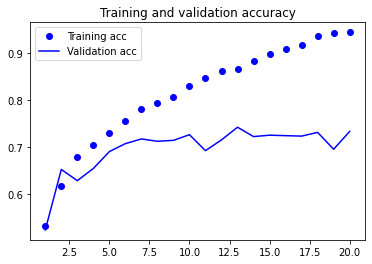

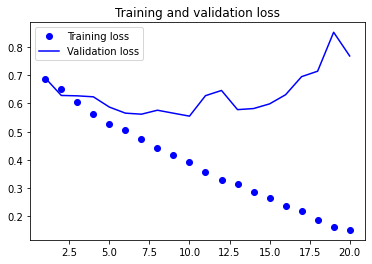

Test loss: 0.1595541387796402 / Test accuracy: 0.9390000104904175


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Generate generalization metrics
score = model.evaluate(train_generator, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 18s 175ms/step - loss: 0.6929 - acc: 0.4945 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 17s 174ms/step - loss: 0.6817 - acc: 0.5405 - val_loss: 0.6553 - val_acc: 0.6090
Epoch 3/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6660 - acc: 0.5800 - val_loss: 0.6367 - val_acc: 0.6220
Epoch 4/20
100/100 [==============================] - 18s 181ms/step - loss: 0.6416 - acc: 0.6245 - val_loss: 0.6173 - val_acc: 0.6500
Epoch 5/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6323 - acc: 0.6250 - val_loss: 0.6032 - val_acc: 0.6710
Epoch 6/20
100/100 [==============================] - 17s 171ms/step - loss: 0.6206 - acc: 0.6450 - val_loss: 0.6097 - val_acc: 0.6500
Epoch 7/20
100/100 [==============================] - 17s 173ms/step - loss: 0.6105 - acc: 0.6705 - val_lo

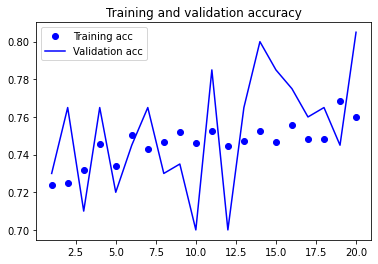

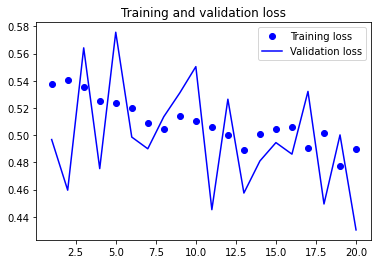

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Generate generalization metrics
score = model.evaluate(train_generator, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./saved_model/assets


In [ ]:
# Load the model
from tensorflow.keras.models import Sequential, save_model, load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

filepath = './saved_model'

# Model configuration
img_width, img_height = 150, 150
model = load_model(filepath, compile = True)



# Generate generalization metrics
score = model.evaluate(train_generator, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 0.4702562093734741 / Test accuracy: 0.7764999866485596
